In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Librería matriz de confusión
from sklearn.metrics import confusion_matrix
# Librería para curva de ROC
from sklearn.metrics import roc_curve, auc
# Librerias para regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Libreria para trabajar cadenas de texto
import re

In [3]:
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1q-d4ynkoY0ryNcDBd7ABuO3kc1wSaRzU'
# Nombre del archivo local donde se descargará el CSV
Dataset_bankChurners = 'BankChurners.csv'

# Descarga del archivo CSV desde Google Drive
gdown.download(url, Dataset_bankChurners, quiet=False)

# Carga del archivo CSV en un DataFrame de pandas
customer_data = pd.read_csv(Dataset_bankChurners)

# Muestra las primeras filas del DataFrame para verificar
print(customer_data.head(2))

Downloading...
From: https://drive.google.com/uc?id=1q-d4ynkoY0ryNcDBd7ABuO3kc1wSaRzU
To: C:\Users\HP\Downloads\BankChurners.csv
100%|█████████████████████████████████████████████████████████████████████████████| 1.51M/1.51M [00:00<00:00, 6.89MB/s]

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   

   Naive_Bayes_Cl

In [5]:
customer_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
# Antes de entrenar, completo valores vacíos de la variable edad: 
edad_mediana = customer_data['Customer_Age'].median()
customer_data['Age_Completa'] = customer_data['Customer_Age'].fillna(edad_mediana,
                                      inplace = False)
customer_data['Age_Completa'].isnull().value_counts()

False    10127
Name: Age_Completa, dtype: int64

In [7]:
# Genero predictores: SEX
sexo_sup = customer_data[['Attrition_Flag','Gender']].groupby(by=['Gender']).mean().reset_index()
sexo_sup.rename(columns={'Attrition_Flag': 'Gender_Att'}, inplace=True)
customer_data = customer_data.merge(sexo_sup,
              left_on = 'Gender',
              right_on = 'Gender',
              how = 'left')

C:\Users\HP\AppData\Local\Temp\ipykernel_13224\2478778317.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  sexo_sup = customer_data[['Attrition_Flag','Gender']].groupby(by=['Gender']).mean().reset_index()


In [8]:
Education_sup = customer_data[['Attrition_Flag','Education_Level']].groupby(by=['Education_Level']).mean().reset_index()
Education_sup.rename(columns={'Attrition_Flag': 'Education_Level_att'}, inplace=True)
customer_data = customer_data.merge(Education_sup,
              left_on = 'Education_Level',
              right_on = 'Education_Level',
              how = 'left')

C:\Users\HP\AppData\Local\Temp\ipykernel_13224\533984404.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  Education_sup = customer_data[['Attrition_Flag','Education_Level']].groupby(by=['Education_Level']).mean().reset_index()


In [16]:
customer_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Age_Completa
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,45
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,49
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,51
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,40
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,40


## TRAIN Y TEST 

In [9]:
cantidad_registros = customer_data.shape[0]
semilla = 15
np.random.seed(semilla)
serie_random = np.random.rand(cantidad_registros)
customer_data['TRAIN'] = np.where(serie_random < 0.3, 0, 1)

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Suponiendo que ya tienes un DataFrame llamado 'customer_data'
label_encoder = LabelEncoder()
customer_data['Attrition_Flag'] = label_encoder.fit_transform(customer_data['Attrition_Flag'])
customer_data['Education_Level'] = label_encoder.fit_transform(customer_data['Education_Level'])
customer_data['Gender'] = label_encoder.fit_transform(customer_data['Gender'])
customer_data['Marital_Status'] = label_encoder.fit_transform(customer_data['Marital_Status'])
customer_data['Income_Category'] = label_encoder.fit_transform(customer_data['Income_Category'])
customer_data['Card_Category'] = label_encoder.fit_transform(customer_data['Card_Category'])

In [30]:
customer_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Age_Completa,TRAIN
0,768805383,1,45,1,3,3,1,2,0,39,...,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,45,1
1,818770008,1,49,0,5,2,2,4,0,44,...,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,49,0
2,713982108,1,51,1,3,2,1,3,0,36,...,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,51,0
3,769911858,1,40,0,4,3,3,4,0,34,...,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,40,1
4,709106358,1,40,1,3,5,1,2,0,21,...,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,40,0


In [31]:
# Cómo quedó la división??
resumen = customer_data.groupby('TRAIN').agg(      
    Cant = ('Attrition_Flag', 'count'),
    Cant_Exito = ('Attrition_Flag', 'sum'),    
    Tasa_Exito = ('Attrition_Flag', 'mean')
).reset_index()
resumen

,TRAIN,Cant,Cant_Exito,Tasa_Exito
0,0,2995,2509,0.837730
1,1,7132,5991,0.840017


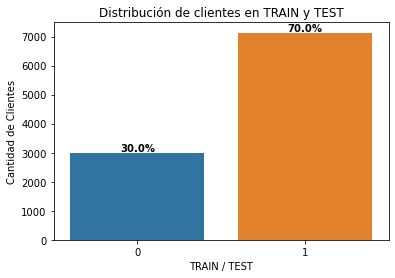

In [28]:
cantidad = len(customer_data['Attrition_Flag'])

sns.countplot(data = customer_data,
              x = "TRAIN")
plt.xlabel('TRAIN / TEST')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de clientes en TRAIN y TEST')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

Text(0.5, 1.0, '¿Es la tasa de abandono igual en ambas subporciones de la muestra?')

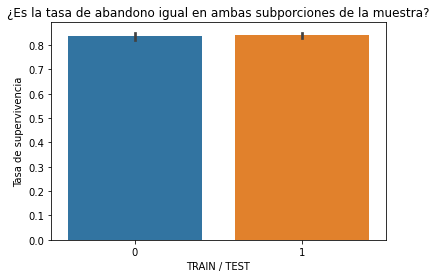

In [27]:
sns.barplot(data = customer_data,
                x = 'TRAIN',
                y = 'Attrition_Flag')
plt.xlabel('TRAIN / TEST')
plt.ylabel('Tasa de supervivencia')
plt.title('¿Es la tasa de abandono igual en ambas subporciones de la muestra?')

Conclusión: a partir del gráfico podemos concluir que la tasa de abandono de nuestros clientes es similar tanto en mi muestra separada para pruebas cómo en la otra parte de nuestra base.